# Agrupación de Clientes Según Comportamientos de Compra

## Contexto

Trabajas en una empresa de análisis de datos para una tienda en línea. La empresa quiere mejorar su estrategia de marketing personalizando las ofertas y promociones para diferentes tipos de clientes, basándose en su comportamiento de compra. El objetivo es identificar grupos de clientes que tengan patrones de compra similares, lo que permitirá crear campañas de marketing más efectivas y dirigidas.

## Objetivo

Tu tarea es desarrollar un sistema que agrupe a los clientes según sus características de compra. Las características de cada cliente están relacionadas con su comportamiento a lo largo del último año y son las siguientes:

- **Monto total gastado** en el último año (en dólares).
- **Frecuencia de compras** (número de compras realizadas en el último año).
- **Categorías de productos preferidas** (número de compras realizadas en diferentes categorías como: tecnología, ropa, alimentos, entre otras).

Con estas características, tu objetivo es construir un modelo que agrupe a los clientes en **clusters** (grupos) que compartan comportamientos similares.

## Instrucciones

Deberás implementar tres funciones principales para lograr el objetivo:

### 1. `generar_datos_clientes(num_muestras)`

Esta función genera un conjunto de datos ficticio con `num_muestras` clientes. Cada cliente debe tener las siguientes características:

- **Monto total gastado**: Un valor numérico entre 100 y 10,000 dólares.
- **Frecuencia de compras**: Un valor entre 1 y 100, que representa el número de compras realizadas durante el último año.
- **Categorías preferidas**: Un conjunto de números que representa la cantidad de compras realizadas en diferentes categorías de productos (por ejemplo: tecnología, ropa, alimentos, etc.). Puedes generar entre 3 y 5 categorías.

### 2. `entrenar_modelo_cluster(data)`

Esta función recibe los datos generados por la función `generar_datos_clientes`.

Utiliza un algoritmo de agrupamiento no supervisado para descubrir patrones en los datos y dividir a los clientes en diferentes clusters. El modelo debe ser capaz de agrupar a los clientes en grupos significativos según sus comportamientos de compra.

**Nota**: El número de clusters no está predeterminado, por lo que tendrás que elegir un enfoque que permita decidir cuántos clusters son adecuados para los datos.

### 3. `predecir_cluster(modelo, cliente)`

Esta función recibe un cliente nuevo (con sus características de monto gastado, frecuencia de compras y categorías preferidas) y el modelo entrenado.

La función debe predecir a qué cluster pertenece este cliente, es decir, debe identificar el grupo al que este cliente tiene más similitudes con los demás clientes del conjunto entrenado.

## Consideraciones

- **Elección del número de clusters**: El número de clusters no está especificado y es una decisión que deberás tomar durante el desarrollo del modelo. Puedes explorar diferentes técnicas, como el **método del codo**, para determinar el número óptimo de clusters.
  
- **Evaluación del modelo**: Aunque este es un modelo no supervisado, puedes evaluar la calidad de los grupos observando qué tan homogéneos son los clientes dentro de cada cluster y qué tan diferentes son los clusters entre sí.


C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

El número óptimo de clusters es: 4
El cliente nuevo pertenece al cluster: 3


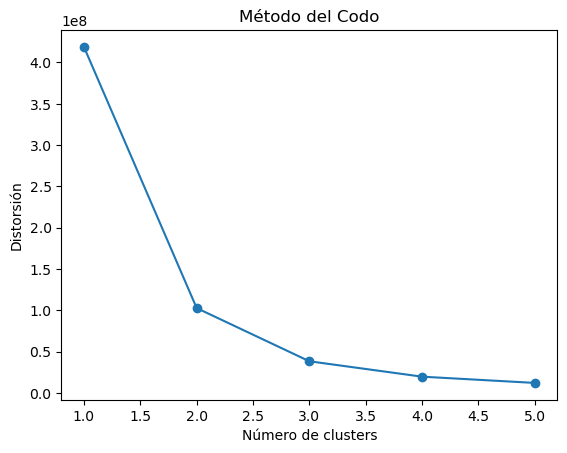

In [1]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 1. Generación de Datos de Clientes
def generar_datos_clientes(num_muestras=50):
    # Monto total gastado (entre 100 y 10,000 dólares)
    monto = np.random.uniform(100, 10000, num_muestras)
    
    # Frecuencia de compras (entre 1 y 100)
    frecuencia = np.random.randint(1, 101, num_muestras)
    
    # Categorías preferidas (3 categorías con compras entre 0 y 20)
    categorias = np.random.randint(0, 20, (num_muestras, 3))
    
    # Sumar las compras realizadas en cada categoría
    total_categorias = categorias.sum(axis=1)
    
    # Crear el conjunto de datos con las características
    datos = np.column_stack((monto, frecuencia, total_categorias))
    
    # Etiquetas dummy (no necesarias para clustering)
    etiquetas = np.zeros(num_muestras)
    
    return datos, etiquetas

# 2. Entrenamiento del Modelo de Clustering (KMeans)
def entrenar_modelo_cluster(datos, n_clusters=3):
    scaler = StandardScaler()
    datos_escalados = scaler.fit_transform(datos)  # Escalado de los datos
    
    # Inicialización y entrenamiento de KMeans
    modelo = KMeans(n_clusters=n_clusters, n_init=5, max_iter=100, random_state=42)
    modelo.fit(datos_escalados)
    
    return modelo, scaler

# 3. Predicción del Cluster de un Cliente Nuevo
def predecir_cluster(modelo, scaler, cliente):
    # Convertimos el cliente a un array y lo escalamos
    cliente_array = np.array(cliente).reshape(1, -1)
    cliente_escalado = scaler.transform(cliente_array)
    
    # Predicción del cluster
    cluster = modelo.predict(cliente_escalado)
    return int(cluster[0])  # Retornamos el número del cluster como entero

# 4. Método del Codo para Encontrar el Número Óptimo de Clusters
def encontrar_numero_optimo_clusters(datos):
    scaler = StandardScaler()
    datos_escalados = scaler.fit_transform(datos)  # Escalado de los datos
    
    mejor_k = 2
    mejor_score = -1
    
    # Evaluación para diferentes valores de k
    for k in range(2, 6):
        modelo = KMeans(n_clusters=k, n_init=5, max_iter=100, random_state=42)
        etiquetas = modelo.fit_predict(datos_escalados)
        
        # Calculamos el Silhouette Score
        score = silhouette_score(datos_escalados, etiquetas)
        
        if score > mejor_score:
            mejor_k = k
            mejor_score = score
    
    return mejor_k

# Ejemplo de ejecución
if __name__ == "__main__":
    # 1. Generar datos de clientes (50 muestras)
    datos_clientes, _ = generar_datos_clientes(50)
    
    # 2. Encontrar el número óptimo de clusters
    numero_optimo_clusters = encontrar_numero_optimo_clusters(datos_clientes)
    print(f"El número óptimo de clusters es: {numero_optimo_clusters}")
    
    # 3. Entrenar el modelo KMeans con el número óptimo de clusters
    modelo, scaler = entrenar_modelo_cluster(datos_clientes, n_clusters=numero_optimo_clusters)
    
    # 4. Predecir el cluster para un cliente nuevo
    cliente_nuevo = [2500, 60, 15]  # Un cliente con $2500 gastados, 60 compras y 15 en total de categorías
    cluster_cliente_nuevo = predecir_cluster(modelo, scaler, cliente_nuevo)
    print(f"El cliente nuevo pertenece al cluster: {cluster_cliente_nuevo}")
    
    # 5. Graficar el método del codo (inercia para diferentes k)
    distorsion = []
    for k in range(1, 6):
        kmeans = KMeans(n_clusters=k, n_init=5, max_iter=100, random_state=42)
        kmeans.fit(datos_clientes)
        distorsion.append(kmeans.inertia_)
    
    plt.plot(range(1, 6), distorsion, marker='o')
    plt.title('Método del Codo')
    plt.xlabel('Número de clusters')
    plt.ylabel('Distorsión')
    plt.show()

C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

El número óptimo de clusters es: 4
El cliente nuevo pertenece al cluster: 3


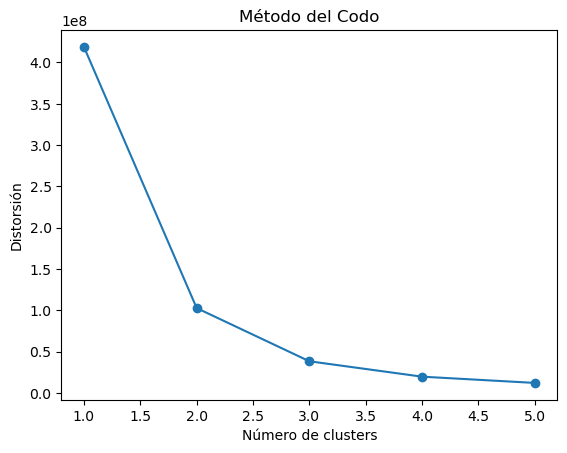

In [1]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 1. Generación de Datos de Clientes
def generar_datos_clientes(num_muestras=50):
    # Monto total gastado (entre 100 y 10,000 dólares)
    monto = np.random.uniform(100, 10000, num_muestras)
    
    # Frecuencia de compras (entre 1 y 100)
    frecuencia = np.random.randint(1, 101, num_muestras)
    
    # Categorías preferidas (3 categorías con compras entre 0 y 20)
    categorias = np.random.randint(0, 20, (num_muestras, 3))
    
    # Sumar las compras realizadas en cada categoría
    total_categorias = categorias.sum(axis=1)
    
    # Crear el conjunto de datos con las características
    datos = np.column_stack((monto, frecuencia, total_categorias))
    
    # Etiquetas dummy (no necesarias para clustering)
    etiquetas = np.zeros(num_muestras)
    
    return datos, etiquetas

# 2. Entrenamiento del Modelo de Clustering (KMeans)
def entrenar_modelo_cluster(datos, n_clusters=3):
    scaler = StandardScaler()
    datos_escalados = scaler.fit_transform(datos)  # Escalado de los datos
    
    # Inicialización y entrenamiento de KMeans
    modelo = KMeans(n_clusters=n_clusters, n_init=5, max_iter=100, random_state=42)
    modelo.fit(datos_escalados)
    
    return modelo, scaler

# 3. Predicción del Cluster de un Cliente Nuevo
def predecir_cluster(modelo, scaler, cliente):
    # Convertimos el cliente a un array y lo escalamos
    cliente_array = np.array(cliente).reshape(1, -1)
    cliente_escalado = scaler.transform(cliente_array)
    
    # Predicción del cluster
    cluster = modelo.predict(cliente_escalado)
    return int(cluster[0])  # Retornamos el número del cluster como entero

# 4. Método del Codo para Encontrar el Número Óptimo de Clusters
def encontrar_numero_optimo_clusters(datos):
    scaler = StandardScaler()
    datos_escalados = scaler.fit_transform(datos)  # Escalado de los datos
    
    mejor_k = 2
    mejor_score = -1
    
    # Evaluación para diferentes valores de k
    for k in range(2, 6):
        modelo = KMeans(n_clusters=k, n_init=5, max_iter=100, random_state=42)
        etiquetas = modelo.fit_predict(datos_escalados)
        
        # Calculamos el Silhouette Score
        score = silhouette_score(datos_escalados, etiquetas)
        
        if score > mejor_score:
            mejor_k = k
            mejor_score = score
    
    return mejor_k

# Ejemplo de ejecución
if __name__ == "__main__":
    # 1. Generar datos de clientes (50 muestras)
    datos_clientes, _ = generar_datos_clientes(50)
    
    # 2. Encontrar el número óptimo de clusters
    numero_optimo_clusters = encontrar_numero_optimo_clusters(datos_clientes)
    print(f"El número óptimo de clusters es: {numero_optimo_clusters}")
    
    # 3. Entrenar el modelo KMeans con el número óptimo de clusters
    modelo, scaler = entrenar_modelo_cluster(datos_clientes, n_clusters=numero_optimo_clusters)
    
    # 4. Predecir el cluster para un cliente nuevo
    cliente_nuevo = [2500, 60, 15]  # Un cliente con $2500 gastados, 60 compras y 15 en total de categorías
    cluster_cliente_nuevo = predecir_cluster(modelo, scaler, cliente_nuevo)
    print(f"El cliente nuevo pertenece al cluster: {cluster_cliente_nuevo}")
    
    # 5. Graficar el método del codo (inercia para diferentes k)
    distorsion = []
    for k in range(1, 6):
        kmeans = KMeans(n_clusters=k, n_init=5, max_iter=100, random_state=42)
        kmeans.fit(datos_clientes)
        distorsion.append(kmeans.inertia_)
    
    plt.plot(range(1, 6), distorsion, marker='o')
    plt.title('Método del Codo')
    plt.xlabel('Número de clusters')
    plt.ylabel('Distorsión')
    plt.show()